In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('tableau-colorblind10')

In [3]:
pbpfoc4 = pd.read_csv('../data/pbpfoc4.csv')

In [4]:
pbpfoc4.head()

,play_id,game_id,date_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,...,pass_touchdown,rush_touchdown,return_touchdown,stad,temp,humd,wspd,wdir,cond,surf
0,139,2009091000,2009-09-10PIT,PIT,TEN,PIT,home,TEN,PIT,56.0,...,0.0,0.0,0.0,Heinz Field,67.0,54.0,9.0,E,Mostly Cloudy,Grass
1,228,2009091000,2009-09-10PIT,PIT,TEN,TEN,away,PIT,TEN,96.0,...,0.0,0.0,0.0,Heinz Field,67.0,54.0,9.0,E,Mostly Cloudy,Grass
2,365,2009091000,2009-09-10PIT,PIT,TEN,PIT,home,TEN,TEN,41.0,...,0.0,0.0,0.0,Heinz Field,67.0,54.0,9.0,E,Mostly Cloudy,Grass
3,522,2009091000,2009-09-10PIT,PIT,TEN,TEN,away,PIT,PIT,19.0,...,0.0,0.0,0.0,Heinz Field,67.0,54.0,9.0,E,Mostly Cloudy,Grass
4,603,2009091000,2009-09-10PIT,PIT,TEN,PIT,home,TEN,PIT,79.0,...,0.0,0.0,0.0,Heinz Field,67.0,54.0,9.0,E,Mostly Cloudy,Grass


In [6]:
pbpfoc4.dtypes[:50]

play_id                         int64
game_id                         int64
date_id                        object
home_team                      object
away_team                      object
posteam                        object
posteam_type                   object
defteam                        object
side_of_field                  object
yardline_100                  float64
game_date                      object
quarter_seconds_remaining     float64
half_seconds_remaining        float64
game_seconds_remaining        float64
game_half                      object
quarter_end                     int64
drive                           int64
sp                              int64
qtr                             int64
down                          float64
goal_to_go                    float64
time                           object
yrdln                          object
ydstogo                         int64
ydsnet                          int64
desc                           object
play_type   

In [7]:
pbpfoc4.dtypes[50:]

posteam_score_post         float64
defteam_score_post         float64
score_differential_post    float64
first_down_rush            float64
first_down_pass            float64
first_down_penalty         float64
third_down_converted       float64
third_down_failed          float64
fourth_down_converted      float64
fourth_down_failed         float64
incomplete_pass            float64
interception               float64
fumble_forced              float64
fumble_not_forced          float64
fumble_out_of_bounds       float64
solo_tackle                float64
penalty                    float64
tackled_for_loss           float64
fumble_lost                float64
qb_hit                     float64
rush_attempt               float64
pass_attempt               float64
sack                       float64
touchdown                  float64
pass_touchdown             float64
rush_touchdown             float64
return_touchdown           float64
stad                        object
temp                

In [5]:
pbpfoc4['play_type'].value_counts()

punt          23912
field_goal     8988
pass           3006
no_play        1875
run            1715
qb_kneel         29
Name: play_type, dtype: int64

In [6]:
pbpfoc4pass = pbpfoc4[pbpfoc4['play_type']=='pass']

In [7]:
pbpfoc4pass['pass_location'].value_counts()

right     1131
left       913
middle     741
Name: pass_location, dtype: int64

In [8]:
pbpfoc4run = pbpfoc4[pbpfoc4['play_type']=='run']

In [15]:
pbpfoc4run.shape

(1715, 84)

In [9]:
pbpfoc4run['run_location'].value_counts()

middle    692
right     490
left      462
Name: run_location, dtype: int64

In [10]:
pbpfoc4run['run_gap'].value_counts()

end       371
guard     359
tackle    224
Name: run_gap, dtype: int64

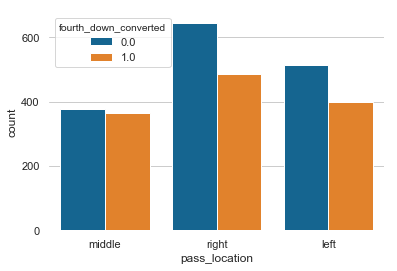

In [12]:
# success percentages of 4th down by field position (group into 20yds)
sns.set(style="whitegrid")
plt.style.use('tableau-colorblind10')
ax = sns.countplot(x="pass_location", hue="fourth_down_converted", data=pbpfoc4pass)
sns.set(font_scale=1.5)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
fig = ax.get_figure()
fig.savefig('../images/pass_location.png')

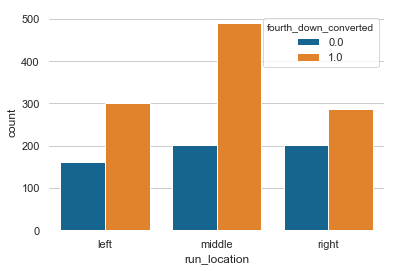

In [13]:
# success percentages of 4th down by field position (group into 20yds)
sns.set(style="whitegrid")
plt.style.use('tableau-colorblind10')
ax = sns.countplot(x="run_location", hue="fourth_down_converted", data=pbpfoc4run)
sns.set(font_scale=1.5)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
fig = ax.get_figure()
fig.savefig('../images/run_location.png')

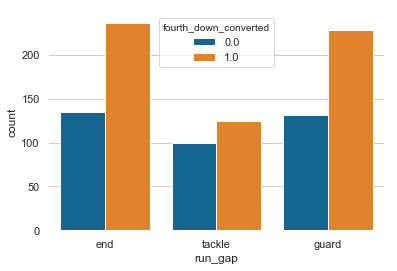

In [14]:
# success percentages of 4th down by field position (group into 20yds)
sns.set(style="whitegrid")
plt.style.use('tableau-colorblind10')
ax = sns.countplot(x="run_gap", hue="fourth_down_converted", data=pbpfoc4run)
sns.set(font_scale=1.5)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
fig = ax.get_figure()
fig.savefig('../images/run_gap.png')